# About Doctor's consultant fee dataset:<br>

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. we have a dataset which is consist of details of doctor, their qualitfication, experiance , rating and from which city and location they belong to along with their consultant fee. dataset is messy, it has missing value, multiple information are stored in single column <br>

# **Problem statement:**<br>
Basis on the given dataset, we have to predict the doctor consultant fee.  

# **Feature details:**<br>
1. Qualification: Qualification and degrees held by the doctor<br>

2. Experience: Experience of the doctor in number of years<br>

3. Rating: Rating given by patients<br>

4. Profile: Type of the doctor<br>

5. Miscellaneous_Info: Extra information about the doctor<br>

6. Fees: Fees charged by the doctor (Target Variable)<br>

7. Place: Area and the city where the doctor is located<br>
    



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
doctor_fee_train = pd.read_excel(r"C:/Users/HP/Desktop/data science stuff/Data trained/Projects/Doctor's Consultation Fees Prediction/Final_Train.xlsx")
doctor_fee_test = pd.read_excel(r"C:/Users/HP/Desktop/data science stuff/Data trained/Projects/Doctor's Consultation Fees Prediction/Final_Test.xlsx")

In [3]:
print("Train data shape",doctor_fee_train.shape)
print("Train data shape",doctor_fee_test.shape)

Train data shape (5961, 7)
Train data shape (1987, 6)


We have seprate train and test dataset, training dataset file is containing 5961 rows and 7 columns.On the other hand, we ahve 1987 rows and 6 columns in our test dataset. test as we know doesnt contain target feature 

In [4]:
doctor_fee_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
doctor_fee_train.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [6]:
doctor_fee_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [7]:
doctor_fee_test.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500"


In [8]:
def data_info(x):
    x.info()

In [9]:
data_info(doctor_fee_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [10]:
data_info(doctor_fee_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [11]:
def missing_val(x):
    missing  = {}
    for i in x.columns:
        if x[i].isnull().sum() >0:
            missing[i] = x[i].isnull().sum()
    print(missing)
missing_val(doctor_fee_train)
missing_val(doctor_fee_test)

{'Rating': 3302, 'Place': 25, 'Miscellaneous_Info': 2620}
{'Rating': 1090, 'Place': 6, 'Miscellaneous_Info': 834}


All the columns are object datatype and only target variable in int. it has been observed that we have got missing value in a few of the columns like Rating,place andmiscellaneous.
let see how much missing values we have in each columns.

In [12]:
length = len(doctor_fee_train)
print("trainig data***** :: ","\n",doctor_fee_train.isnull().sum()/length*100)
test_length = len(doctor_fee_test)
print("\n")
print("test data******:: ", "\n",doctor_fee_test.isnull().sum()/test_length*100)

trainig data***** ::  
 Qualification          0.000000
Experience             0.000000
Rating                55.393390
Place                  0.419393
Profile                0.000000
Miscellaneous_Info    43.952357
Fees                   0.000000
dtype: float64


test data******::  
 Qualification          0.000000
Experience             0.000000
Rating                54.856568
Place                  0.301963
Profile                0.000000
Miscellaneous_Info    41.972823
dtype: float64


we have got lot of missing values in Rating and Miscellaneous_Inf and imputaing may lead to bais 

# feature extraction

In [13]:
# creating a method for extracting the degree of the doctor from the qualification 
def new_col(x):
    Degree = []
    for i in x["Qualification"].str.split():
        Degree.append(i[0])
    ser_Degree = pd.Series(Degree)
    x["Doc_Degree"] =  ser_Degree
    x["Doc_Degree"] = x["Doc_Degree"].replace(",","",regex = True)

In [14]:
new_col(doctor_fee_test)
new_col(doctor_fee_train)

from the Qualification column,  i have extracted the degree of the doctor and saved into another variable in the same dataset

In [15]:
# extracting the experiance from the experiance column and applying methods to both the dataset
def experiance_extraction(x):
    x["Doc_Exp"] = x["Experience"].str.split().str[0]

In [16]:
experiance_extraction(doctor_fee_test)
experiance_extraction(doctor_fee_train)

from the experiance column, i have extracted the experiance in year in number and saved into a new variable

In [17]:
# methods which will give city and location
def city_Location(x):
    x["City"] = x["Place"].str.split(",").str[1]
    x["City"] = x["City"].replace(",","",regex = True)
    x["Location"] = x["Place"].str.split(",").str[0]
    x["Location"] = x["Location"].replace(",","",regex = True)

In [18]:
city_Location(doctor_fee_train)
city_Location(doctor_fee_test)

In place column,we have two possible information city name and location in that city where doctor stay or practise. we will get these information and saved into new columns

In [19]:
doctor_fee_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Doc_Degree,Doc_Exp,City,Location
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,24,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,12,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,9,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc,12,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,20,Chennai,Keelkattalai


In [20]:
doctor_fee_train["Rating"] = doctor_fee_train["Rating"].replace("%","",regex = True) 
doctor_fee_test["Rating"] = doctor_fee_test["Rating"].replace("%","",regex = True)

Rating column in boh the datasets have missing valus and i am trying to impute them, to perform any mathematic operation will have to convert it into number datatype and i am removing % sign also.

In [21]:
not_null =  doctor_fee_train[doctor_fee_train["Rating"].notnull()]
not_null["Rating"] = not_null["Rating"].astype(int)

have checked and there is no much difference in mean and median on the columns thus imputing the with Prfile mean.

In [22]:
not_null.groupby("Profile")["Rating"].mean()

Profile
Ayurveda            96.327957
Dentist             97.706016
Dermatologists      93.506270
ENT Specialist      89.315789
General Medicine    91.592308
Homeopath           96.657692
Name: Rating, dtype: float64

Taking Profile wise average rating for that it can be filled missing values

In [23]:
def fillna(x):
    rating = x[0]
    profile = x[1]
    
    if pd.isnull(rating):
        if profile =="Ayurveda":
            return 96.327957
        elif profile =="Dentist":
            return 97.706016
        elif profile =="Dermatologists":
            return 93.506270
        elif profile == "ENT Specialist":
            return 89.315789
        elif profile == "General Medicine":
            return 91.592308
        elif profile == "Homeopath":
            return 96.657692
    else:
        return rating

In [24]:
doctor_fee_train["Rating"] = doctor_fee_train[["Rating","Profile"]].apply(fillna,axis =1)


Have created a method which takes a dataset and under that we are taking two column, columsn Rating and profile, condition is set that and if it is being satified then given rating will be filled in that missing value place

In [25]:
doctor_fee_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Doc_Degree,Doc_Exp,City,Location
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,24,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,12,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9 years experience,89.3158,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,9,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12 years experience,96.328,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc,12,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,20,Chennai,Keelkattalai


In [26]:
test_notnull = doctor_fee_test[doctor_fee_test["Rating"].notnull()]
test_notnull["Rating"] = test_notnull["Rating"].astype(int)

In [27]:
test_notnull.groupby("Profile")["Rating"].mean()

Profile
Ayurveda            96.126984
Dentist             97.674912
Dermatologists      93.263158
ENT Specialist      88.000000
General Medicine    92.871622
Homeopath           96.126437
Name: Rating, dtype: float64

In [28]:
def test_fillna(x):
    rating = x[0]
    profile = x[1]
    
    if pd.isnull(rating):
        if profile =="Ayurveda":
            return 96.126984
        elif profile =="Dentist":
            return 97.674912
        elif profile =="Dermatologists":
            return 93.263158
        elif profile == "ENT Specialist":
            return 88.000000
        elif profile == "General Medicine":
            return 92.871622
        elif profile == "Homeopath":
            return 96.126437
    else:
        return rating

In [29]:
doctor_fee_test["Rating"] = doctor_fee_test[["Rating","Profile"]].apply(test_fillna,axis =1)

appying the same way to impute the missing value in test data rating column by taking mean of profiles of test data 

In [30]:
def missing_val(x):
    missing  = {}
    for i in x.columns:
        if x[i].isnull().sum() >0:
            missing[i] = x[i].isnull().sum()
    print(missing)
missing_val(doctor_fee_train)
missing_val(doctor_fee_test)

{'Place': 25, 'Miscellaneous_Info': 2620, 'City': 26, 'Location': 25}
{'Place': 6, 'Miscellaneous_Info': 834, 'City': 6, 'Location': 6}


Since we have taken degree from qualification columns, experiance from experiance columns and saved them into another new columns, i have taken out city and location from the place columns. so we have go and delete other columns<br>
**We are deleting Qualification ,Experiance , Place and Miscellaneous_info from the dataset**

In [31]:
def remove_columns(x):
    x.drop(columns=["Qualification","Experience","Place","Miscellaneous_Info"],axis = 1,inplace = True)

In [32]:
remove_columns(doctor_fee_train)
remove_columns(doctor_fee_test)

we hava got some missing value in city and location colums, i will remove them becuase it is very less in the dataset like 25 in train set and 6 in tes set out of 1987 in test

In [33]:
doctor_fee_train= doctor_fee_train.dropna() 

In [34]:
doctor_fee_test = doctor_fee_test.dropna()

In [35]:
def missing_val(x):
    missing  = {}
    for i in x.columns:
        if x[i].isnull().sum() >0:
            missing[i] = x[i].isnull().sum()
    print(missing)
missing_val(doctor_fee_train)
missing_val(doctor_fee_test)

{}
{}


In [36]:
print("Training shape",doctor_fee_train.shape)
print("Test shape",doctor_fee_test.shape)

Training shape (5935, 7)
Test shape (1981, 6)


data has been clean now, there is no missing values, i will further encodes this.

In [37]:
doctor_fee_train.head()

,Rating,Profile,Fees,Doc_Degree,Doc_Exp,City,Location
0,100,Homeopath,100,BHMS,24,Ernakulam,Kakkanad
1,98,Ayurveda,350,BAMS,12,Bangalore,Whitefield
2,89.3158,ENT Specialist,300,MBBS,9,Bangalore,Mathikere - BEL
3,96.328,Ayurveda,250,BSc,12,Bangalore,Bannerghatta Road
4,100,Ayurveda,250,BAMS,20,Chennai,Keelkattalai


In [38]:
train_data = doctor_fee_train.copy()
test_data = doctor_fee_test.copy()

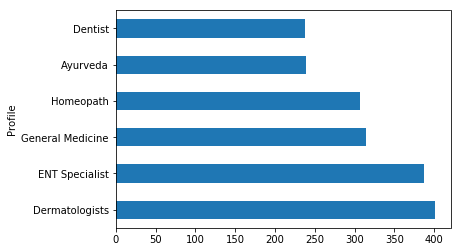

In [39]:
train_data.groupby("Profile")["Fees"].mean().sort_values(ascending =False).plot(kind = "barh");

we see that dermatologists charges high fee followed by ENT spacialist 

In [40]:
train_data["Rating"] =  train_data["Rating"].astype(int) # changing the rating column into int
test_data["Rating"] =  test_data["Rating"].astype(int) # changing the rating column into int

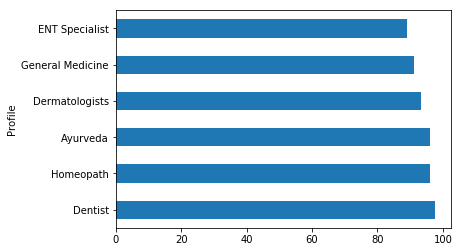

In [41]:
train_data.groupby("Profile")["Rating"].mean().sort_values(ascending =False).plot(kind= "barh");

we see contradict analysis, despite of high charges are being charged ENT and Dermatologist, their average rating isnt so high

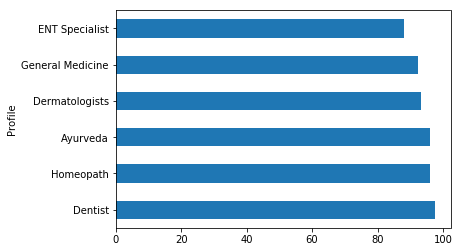

In [42]:
test_data.groupby("Profile")["Rating"].mean().sort_values(ascending =False).plot(kind= "barh");

same observation we have found for test data s well.

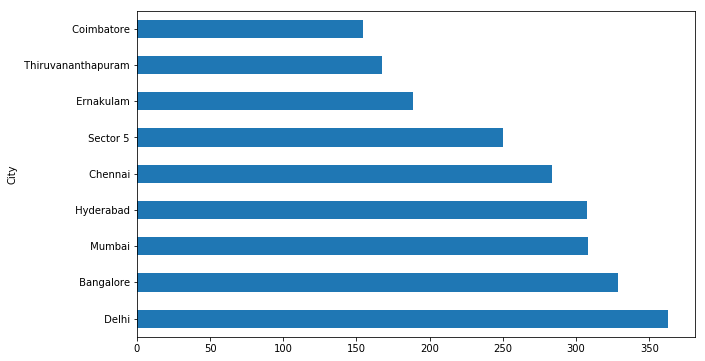

In [43]:
plt.figure(figsize=(10,6))
train_data.groupby("City")["Fees"].mean().sort_values(ascending = False).plot(kind = "barh");

Delhi Doctor charge high fee as compared to other cities, sector 5 is in  Dwarka

# Applying Label encoding

In [44]:
doctor_fee_test.head()

,Rating,Profile,Doc_Degree,Doc_Exp,City,Location
0,92.8716,General Medicine,MBBS,35,Mumbai,Ghatkopar East
1,88,ENT Specialist,MBBS,31,Hyderabad,West Marredpally
2,70,Dermatologists,MBBS,40,Chennai,KK Nagar
3,96.127,Ayurveda,BAMS,0,Delhi,New Ashok Nagar
4,100,Dentist,BDS,16,Bangalore,Kanakpura Road


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
#  profile Label encoding
lb = LabelEncoder()

lb.fit(doctor_fee_train["Profile"]) 

doctor_fee_train["Profile"] = lb.transform(doctor_fee_train["Profile"])

In [47]:
# City Label encoding
lb1 = LabelEncoder()

lb1.fit(doctor_fee_train["City"]) 

doctor_fee_train["City"] = lb1.transform(doctor_fee_train["City"])

In [48]:
#  Doc_Degree Label encoding
lb2 = LabelEncoder()

lb2.fit(doctor_fee_train["Doc_Degree"]) 

doctor_fee_train["Doc_Degree"] = lb2.transform(doctor_fee_train["Doc_Degree"])

In [49]:
#  Location Label encoding
lb3 = LabelEncoder()

lb3.fit(doctor_fee_train["Location"]) 

doctor_fee_train["Location"] = lb3.transform(doctor_fee_train["Location"])

In [50]:
doctor_fee_train.head()

,Rating,Profile,Fees,Doc_Degree,Doc_Exp,City,Location
0,100,5,100,8,24,4,296
1,98,0,350,5,12,0,855
2,89.3158,3,300,49,9,0,452
3,96.328,0,250,11,12,0,68
4,100,0,250,5,20,1,335


In [51]:
doctor_fee_train.dtypes

Rating        object
Profile        int32
Fees           int64
Doc_Degree     int32
Doc_Exp       object
City           int32
Location       int32
dtype: object

In [52]:
doctor_fee_train["Doc_Exp"] =  doctor_fee_train["Doc_Exp"].astype(int)

In [53]:
doctor_fee_train["Rating"] =  doctor_fee_train["Rating"].astype(int)

# Applying the same for test data

In [54]:

#  profile Label encoding
test_lb = LabelEncoder()

test_lb.fit(doctor_fee_test["Profile"]) 

doctor_fee_test["Profile"] = test_lb.transform(doctor_fee_test["Profile"])

In [55]:
# City Label encoding
test_lb1 = LabelEncoder()

test_lb1.fit(doctor_fee_test["City"]) 

doctor_fee_test["City"] = test_lb1.transform(doctor_fee_test["City"])

In [56]:
#  Doc_Degree Label encoding
test_lb2 = LabelEncoder()

test_lb2.fit(doctor_fee_test["Doc_Degree"]) 

doctor_fee_test["Doc_Degree"] = test_lb2.transform(doctor_fee_test["Doc_Degree"])

In [57]:
#  Location Label encoding
test_lb3 = LabelEncoder()

test_lb3.fit(doctor_fee_test["Location"]) 

doctor_fee_test["Location"] = test_lb3.transform(doctor_fee_test["Location"])

In [58]:
doctor_fee_test.head(20)

,Rating,Profile,Doc_Degree,Doc_Exp,City,Location
0,92.8716,4,30,35,6,142
1,88,3,30,31,5,577
2,70,2,30,40,1,212
3,96.127,0,1,0,3,373
4,100,1,2,16,0,231
5,90,1,2,14,1,552
6,94,3,30,23,0,134
7,94,1,2,9,5,31
8,99,0,31,11,0,48
9,96.1264,5,3,44,3,323


In [59]:
doctor_fee_test.dtypes

Rating        object
Profile        int32
Doc_Degree     int32
Doc_Exp       object
City           int32
Location       int32
dtype: object

In [60]:
doctor_fee_test["Doc_Exp"] = doctor_fee_test["Doc_Exp"].astype(int) 

In [61]:
doctor_fee_test["Rating"] =  doctor_fee_test["Rating"].astype(int)

In [62]:
def change_rating(x):
    if x >=0 and x <= 10: 
        return 1
    elif x >= 11 and x <= 20:
        return 2
    elif x >= 21 and x <= 30:
        return 3
    elif x >= 31 and x <= 40:
        return 4
    elif x >= 41 and x <=50:
        return 5
    elif x >= 51 and x <=60:
        return 6
    elif x >= 61 and x <=70:
        return 7
    elif x >= 71 and x <=80:
        return 8
    elif x >= 81 and x <=90:
        return 9
    elif x >= 91 and x <=100:
        return 10
    else:
        return x

In [63]:
doctor_fee_train["Rating"] =  doctor_fee_train["Rating"].apply(change_rating)
doctor_fee_test["Rating"] =  doctor_fee_test["Rating"].apply(change_rating)

In [64]:
doctor_fee_train.head(5)

,Rating,Profile,Fees,Doc_Degree,Doc_Exp,City,Location
0,10,5,100,8,24,4,296
1,10,0,350,5,12,0,855
2,9,3,300,49,9,0,452
3,10,0,250,11,12,0,68
4,10,0,250,5,20,1,335


In [65]:
doctor_fee_test.head(5)

,Rating,Profile,Doc_Degree,Doc_Exp,City,Location
0,10,4,30,35,6,142
1,9,3,30,31,5,577
2,7,2,30,40,1,212
3,10,0,1,0,3,373
4,10,1,2,16,0,231


Have considered the rating from 0 to 10 as conventional way of taking customer satisfaction from 0 to 10.

# EDA

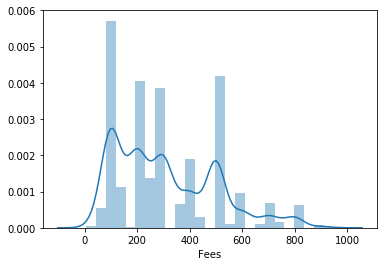

In [66]:
sns.distplot(doctor_fee_train["Fees"])

Fee is starting from 0 to 1000.let see how many instance of 0 fees.<br><br>

post checking the max and min value, we have found mininum fee is 5

In [67]:
doctor_fee_train["Fees"].max()

950

In [68]:
doctor_fee_train["Fees"].min()

5

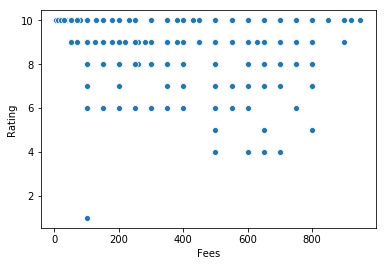

In [69]:
# Checking the relationship

sns.scatterplot(x = "Fees", y = "Rating", data = doctor_fee_train);

doctor with higher rating have higher fee

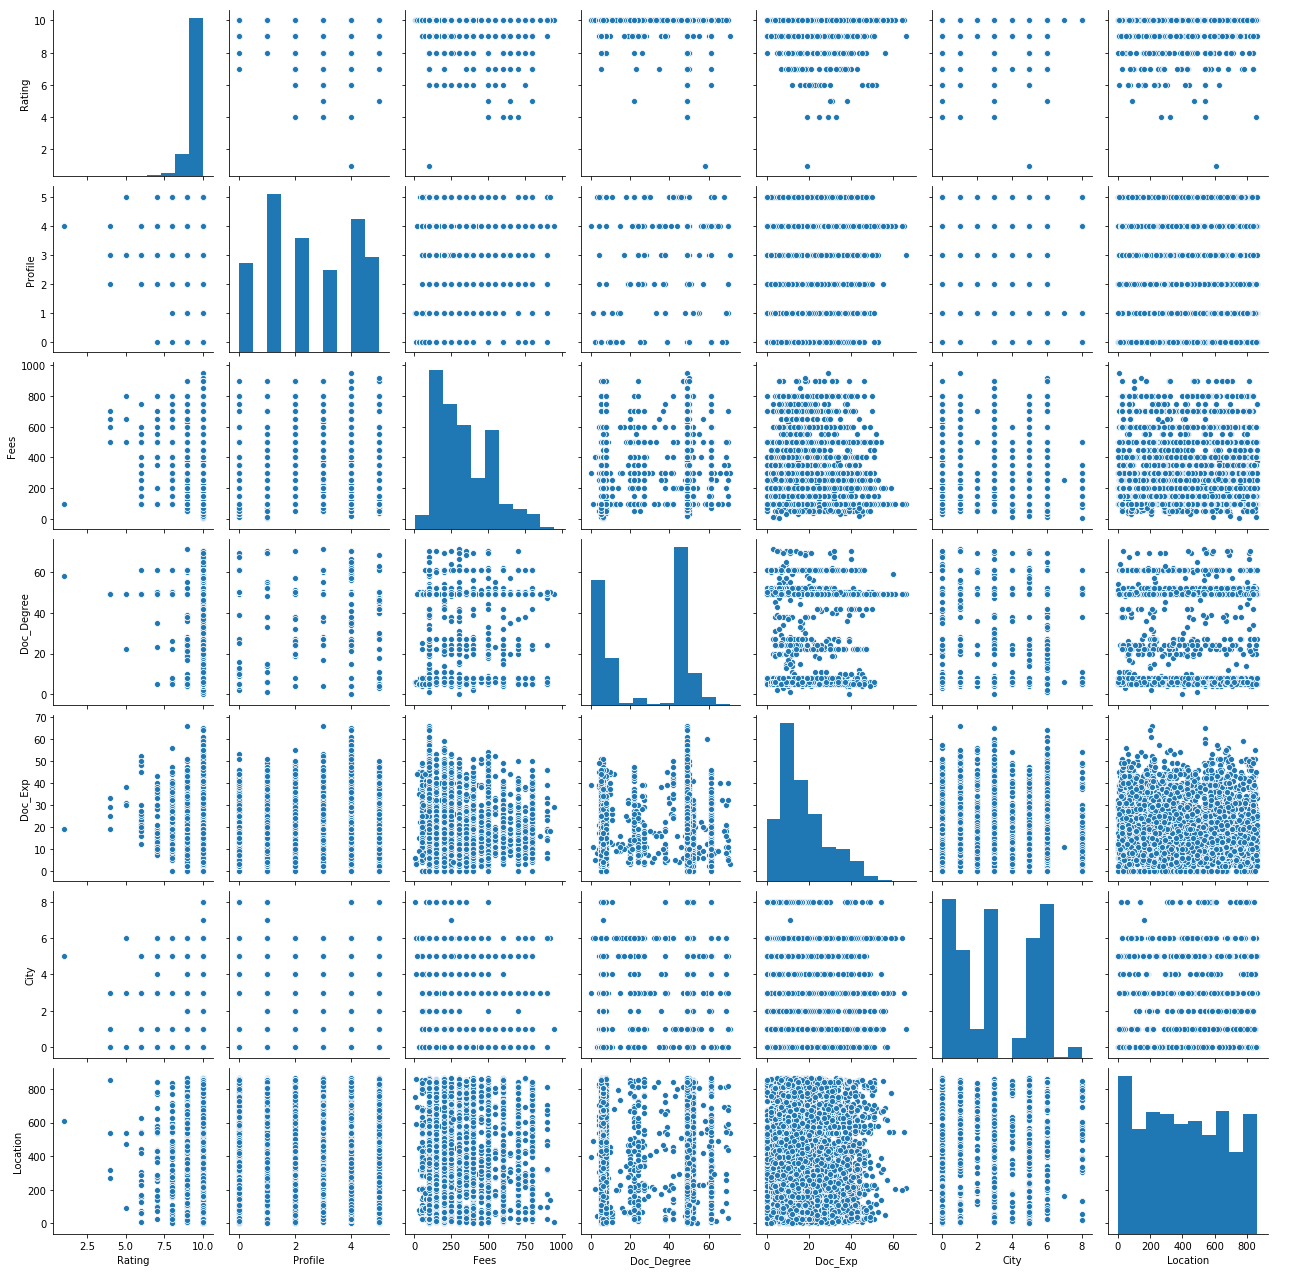

In [70]:
sns.pairplot(doctor_fee_train)

Columns are categorical and extracted from the one column, we see that except rating and fee, none of the feature tell any relation. lets understand more this with correlation plot

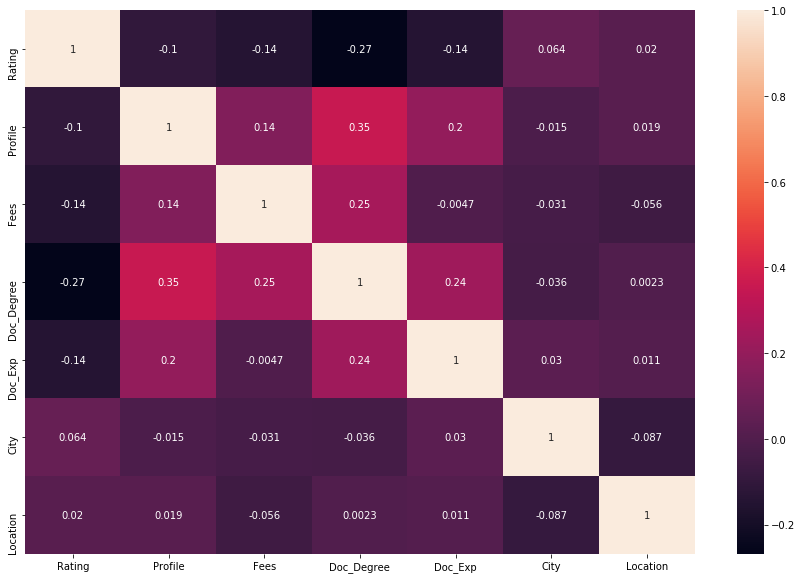

In [71]:
plt.figure(figsize = (15,10))
sns.heatmap(doctor_fee_train.corr(), annot= True)

we see that columns are less correation with Fees. highest correlation is with Doc_degree which is 0.25

# Data preparing for Model

In [72]:
# train data devided into X and Y

X= doctor_fee_train.drop("Fees",axis =1)
y= doctor_fee_train["Fees"]

for i in range(100,500,75):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = i)
    RF.fit(X_train,y_train)
    print("Training score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("Test score",RF.score(X_test,y_test))
    print("R_score", r2_score(y_test,pred))
    print("Mean_squared_error",mean_squared_error(y_test,pred),"\n")

Training score 0.8646263272675838 Random_state 100
Test score 0.13822222061311618
R_score 0.13822222061311618
Mean_squared_error 31316.998911618994 

Training score 0.8683588209642462 Random_state 175
Test score 0.12363485147413533
R_score 0.12363485147413533
Mean_squared_error 32360.021232425745 

Training score 0.8702500743646829 Random_state 250
Test score 0.1398683704731709
R_score 0.1398683704731709
Mean_squared_error 30133.251065046024 

Training score 0.8684133692792784 Random_state 325
Test score 0.13244430530400364
R_score 0.13244430530400364
Mean_squared_error 33223.41257124796 

Training score 0.8657213119600975 Random_state 400
Test score 0.154693272895972
R_score 0.154693272895972
Mean_squared_error 30282.13763291855 

Training score 0.87080595265199 Random_state 475
Test score 0.11141145089107807
R_score 0.11141145089107807
Mean_squared_error 31503.946255297178 



In [73]:
model  = [ RandomForestRegressor(), AdaBoostRegressor(),SVR(),KNeighborsRegressor()]
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.25, random_state = 400)
for i in model:
    i.fit(X_train1,y_train1)
    print("Training score",i.score(X_train1,y_train1),i)
    pred = i.predict(X_test1)
    print("Test score",i.score(X_test1,y_test1))
    print("R_score", r2_score(y_test1,pred))
    print("RMSE",np.sqrt(mean_squared_error(y_test1,pred)))
    print("Mean_squared_error",mean_squared_error(y_test1,pred),"\n")
    

Training score 0.8666537525269984 RandomForestRegressor()
Test score 0.13514378213840506
R_score 0.13514378213840506
RMSE 177.21087343701865
Mean_squared_error 31403.693664311046 

Training score 0.12328426541931425 AdaBoostRegressor()
Test score 0.10651757096962788
R_score 0.10651757096962788
RMSE 180.1197842903843
Mean_squared_error 32443.13669281457 

Training score -0.017367057057368518 SVR()
Test score 0.0045304462076567464
R_score 0.0045304462076567464
RMSE 190.12201170072893
Mean_squared_error 36146.37933313211 

Training score 0.35916777786769394 KNeighborsRegressor()
Test score 0.034341901123611684
R_score 0.034341901123611684
RMSE 187.25356887547906
Mean_squared_error 35063.899056603776 



In [74]:
ada_boost = AdaBoostRegressor()
Para = {"n_estimators": [50,100,150,200],
    "learning_rate":[0.5,1.0,1.5,2.0]}

grid_search_Adabost = GridSearchCV(ada_boost,Para,scoring = "r2",cv =10, n_jobs = -1,verbose=2)
grid_search_Adabost.fit(X_train1,y_train1)
grid_search_Adabost

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.6s finished


GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2', verbose=2)

In [75]:
grid_search_Adabost.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

In [76]:
Grid_ada_boost = AdaBoostRegressor(learning_rate= 0.5,n_estimators= 150)
cross_score = cross_val_score(Grid_ada_boost,X,y, scoring = "r2",cv = 10, n_jobs = -1, verbose=2)
print(cross_score.mean())
print(cross_score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.10420236928350228
0.021024975670246075


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


In [77]:
# using final model for testing test data
Grid_ada_boost.fit(X,y)
pred = Grid_ada_boost.predict(doctor_fee_test)

doctor_fee_test["Pred"] = pred

In [78]:
doctor_fee_test

,Rating,Profile,Doc_Degree,Doc_Exp,City,Location,Pred
0,10,4,30,35,6,142,404.471808
1,9,3,30,31,5,577,410.076032
2,7,2,30,40,1,212,368.767442
3,10,0,1,0,3,373,251.374570
4,10,1,2,16,0,231,282.139738
...,...,...,...,...,...,...,...
1982,10,0,1,10,0,58,248.731474
1983,10,2,31,4,1,96,406.688984
1984,10,4,30,9,1,423,361.256098
1985,10,1,2,12,0,26,248.731474


# Model Saving

In [79]:
import pickle
filename = "Doctor_fee_consultant.pkl"
with open(filename,"wb") as f:
    pickle.dump(Grid_ada_boost,f)

# Conclusion<br>

Dataset was messy, there was no structure. we have extracted the relevant information of the the messy data and saved into new data. I have applying label encoding since have many categories in the dataset.Have applied Random Forest initially to check the best Random state and score. Randomforest is overfitting, so have used multiple models and found that adaboost is working ok on the dataset. the accuracy is too low. i have tried multiple way to improve it but it not improving. i have used like dropping location and with location. changed the rating score into rating but didnt work. All the models are overfit except Adaboost. Thus have selected it for final model.   